In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# This is for regression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor

from sklearn import tree
import joblib

plt.style.use("seaborn")

In [33]:
actual = pd.read_csv("/Users/mz195/BTC_price_db.csv")
arima = pd.read_csv("/Users/mz195/arima_predictions.csv")
varmax = pd.read_csv("/Users/mz195/varmax_predictions.csv")
ses = pd.read_csv("/Users/mz195/ses_predictions.csv")

In [34]:
arima_df = actual.merge(arima, on='time_')
arima_varmax_df = arima_df.merge(varmax, on='time_')
all_models_df = arima_varmax_df.merge(ses, on='time_')
all_models_df.shape

(5101, 5)

<AxesSubplot:>

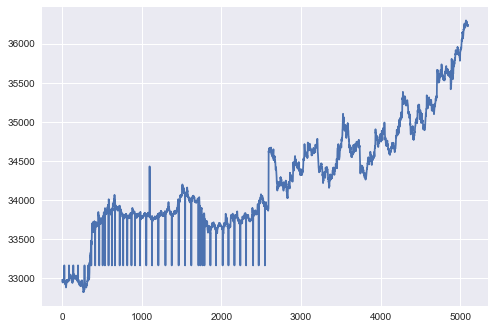

In [35]:
all_models_df["price_avg"].plot(kind="line")

In [39]:
num = int(2500)
all_models_df2 = all_models_df[-(num):]

<AxesSubplot:>

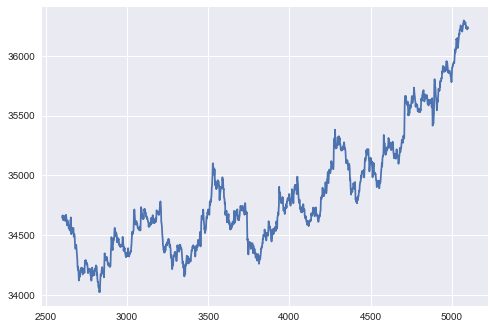

In [40]:
all_models_df2["price_avg"].plot(kind="line")

In [41]:
X = all_models_df2.drop(["time_", "price_avg"], axis=1)
y = all_models_df2.price_avg

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

reg_forest = RandomForestRegressor(
    n_estimators = 100,
    criterion = 'mse')

reg_forest.fit(X_train, y_train)

preds_forest = reg_forest.predict(X_test)

# joblib.dump(reg_forest,"/Users/mz195/Documents/GitHub/Kafka-Twitter-Elasticsearch/server/model_overall")

In [42]:
reg_forest.score(X_test, y_test)

0.9968033333100396

In [43]:
reg_forest.predict([[36243.363523452805, 36243.38404620584, 36245.95208737314]])[0]

36241.17033874997

In [44]:
reg_forest.predict([[36238.46507665485, 36247.01331666087, 36242.81000004]])[0]

36241.32802574997

In [45]:
print("---- Cost functions for Decision Tree Regressor ----")
print("Avg MAE:\t\t\t", mean_absolute_error(y_test, preds_forest))
print("Avg RMSE:\t\t\t", mean_squared_error(y_test, preds_forest, squared=False))
print("Avg MSE:\t\t\t", mean_squared_error(y_test, preds_forest))

---- Cost functions for Decision Tree Regressor ----
Avg MAE:			 21.360216100371165
Avg RMSE:			 28.97287125701707
Avg MSE:			 839.4272688756857


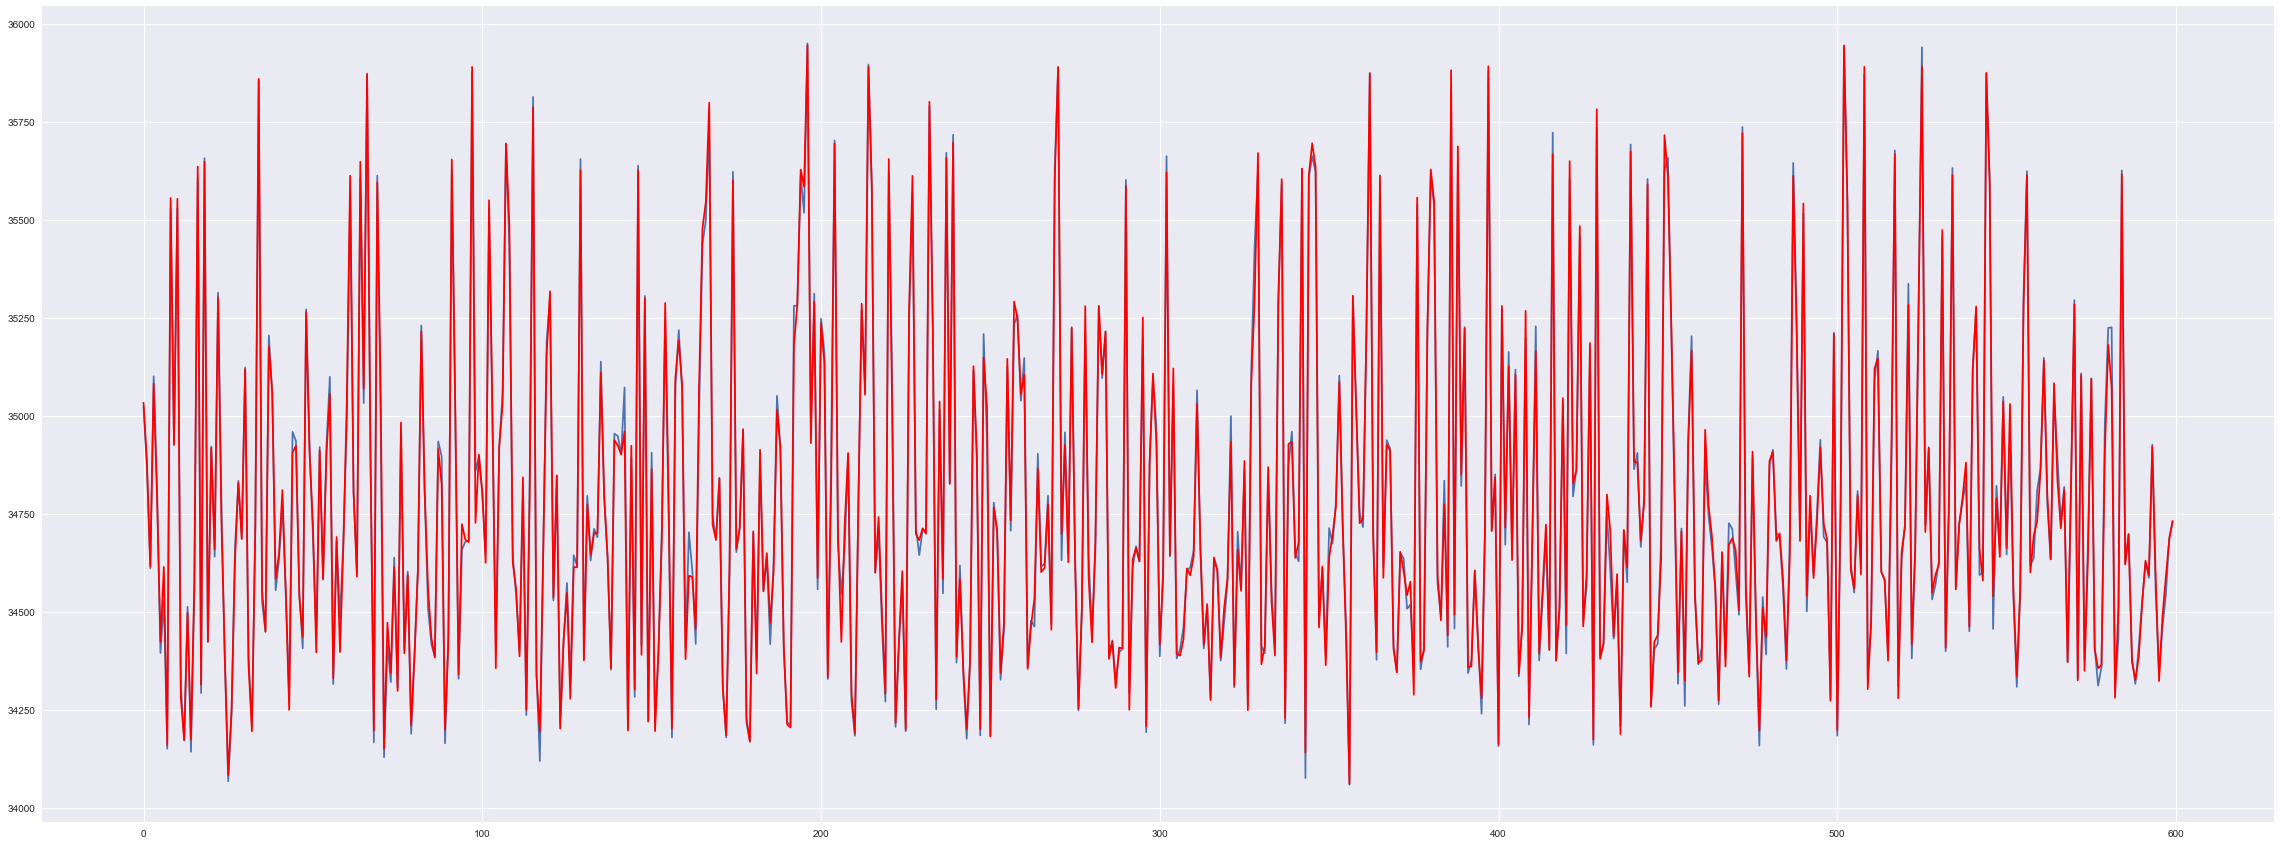

In [13]:
preds2 = [x for x in preds_forest]
test2 = [x for x in y_test]
# plot forecasts against actual outcomes
plt.figure(figsize=(40,15))
plt.plot(test2)
plt.plot(preds2, color='red')
plt.show()

In [47]:
import time
import requests

ARIMA_URL = "http://localhost:9000/predict/ARIMA"
VARMAX_URL = "http://localhost:9000/predict/VARMAX"
SES_URL = "http://localhost:9000/predict/SES"

while(1):
    ARIMA_res = requests.get(url=ARIMA_URL)
    ARIMA_data = ARIMA_res.json()[-2:]

    VARMAX_res = requests.get(url=VARMAX_URL)
    VARMAX_data = VARMAX_res.json()[-2:]

    SES_res = requests.get(url=SES_URL)
    SES_data = SES_res.json()[-2:]

    for i in range(len(ARIMA_data)):
        arima_pred = ARIMA_data[i]["price"]
        varmax_pred = VARMAX_data[i]["price"]
        ses_pred = SES_data[i]["price"]

        current_time = SES_data[i]["datetime"]

        res = reg_forest.predict([[arima_pred, varmax_pred, ses_pred]])[0]

        print("DateTime: {}, Price: {}".format(current_time, res))
        time.sleep(30)

DateTime: 16:57:30, Price: 36265.46135549997
DateTime: 16:58:00, Price: 36265.46135549997
DateTime: 16:58:30, Price: 36264.756296249965
DateTime: 16:58:30, Price: 36265.489311666664
DateTime: 16:59:00, Price: 36248.95201691669
DateTime: 16:59:30, Price: 36228.11806158335
DateTime: 17:00:30, Price: 36236.86038708335
DateTime: 17:01:00, Price: 36230.69491408335
DateTime: 17:01:30, Price: 36212.35739258335
DateTime: 17:02:00, Price: 36235.14579875001
DateTime: 17:02:30, Price: 36225.547817333376
DateTime: 17:03:00, Price: 36204.570770666694
DateTime: 17:03:30, Price: 36242.65950966669
DateTime: 17:04:00, Price: 36244.44946791667
DateTime: 17:04:30, Price: 36243.41186666666
DateTime: 17:05:00, Price: 36232.30417100003
DateTime: 17:05:30, Price: 36235.116856500026
DateTime: 17:06:00, Price: 36233.04305725003
DateTime: 17:06:30, Price: 36256.23014374999
DateTime: 17:07:00, Price: 36262.71804674997
DateTime: 17:07:30, Price: 36262.71804674997
DateTime: 17:08:00, Price: 36243.16471416666
DateT

KeyboardInterrupt: 